In [1]:
%matplotlib inline

In [2]:
!pip install efel

In [3]:
import efel

In [5]:
import urllib
import numpy

In [6]:
test_url = 'https://raw.githubusercontent.com/BlueBrain/eFEL/master/efel/tests/testdata/allfeatures/testdata.txt'

In [7]:
test_data = numpy.loadtxt(urllib.urlopen(test_url))
time = test_data[:,0]
voltage = test_data[:, 1]


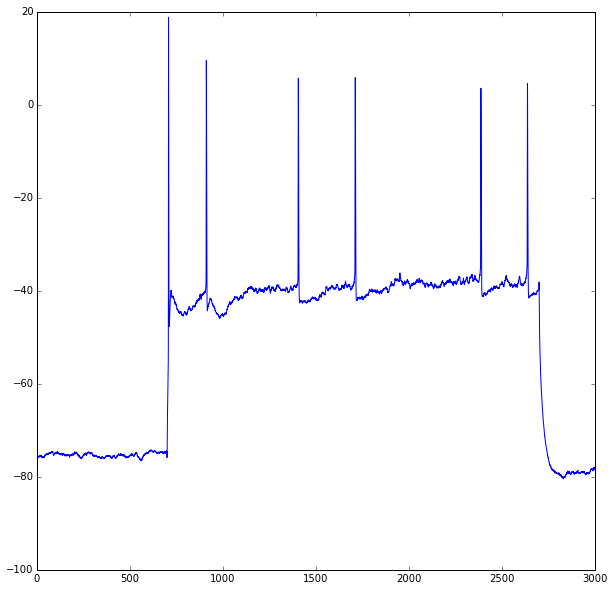

In [10]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

plt.plot(time, voltage)
plt.show()

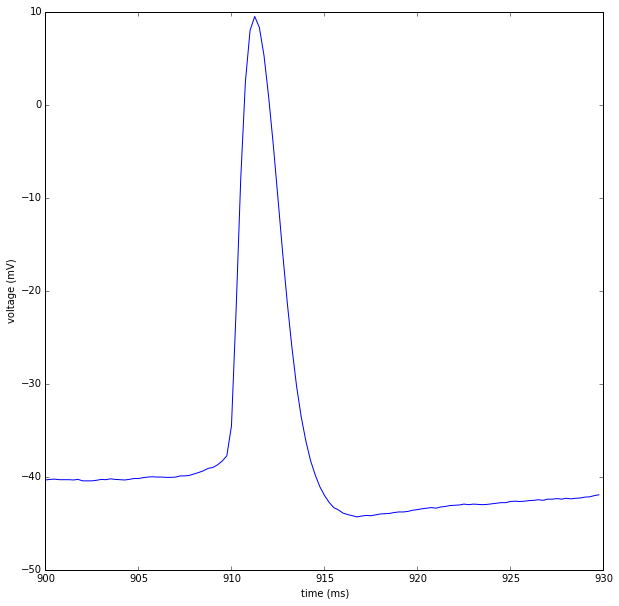

In [14]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10
time_spike_indices = numpy.where((time > 900) & (time < 930))
time_spike = time[time_spike_indices]
voltage_spike = voltage[time_spike_indices]
plt.plot(time_spike, voltage_spike)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

In [15]:
stim_start = 700
stim_end = 2700
trace = {'T': time, 'V': voltage, 'stim_start': [stim_start], 'stim_end': [stim_end]}

In [16]:
feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage'])[0]
print feature_values

{'AP_amplitude': array([ 72.57824413,  46.36725526,  41.15466792,  39.7631751 ,
        36.1614653 ,  37.84892957]), 'AP_begin_time': array([  706.8,   909.8,  1404.3,  1710.3,  2385.7,  2636. ]), 'peak_voltage': array([ 18.7490201 ,   9.26229141,   5.71846652,   5.84323464,
         3.56232023,   4.47506991]), 'AP_begin_width': array([ 4.7,  4.4,  4.7,  4.6,  4.8,  5. ]), 'AP_begin_voltage': array([-53.82922403, -37.10496385, -35.4362014 , -33.91994045,
       -32.59914507, -33.37385967]), 'peak_time': array([  708. ,   911.3,  1406. ,  1712. ,  2387.5,  2637.8])}


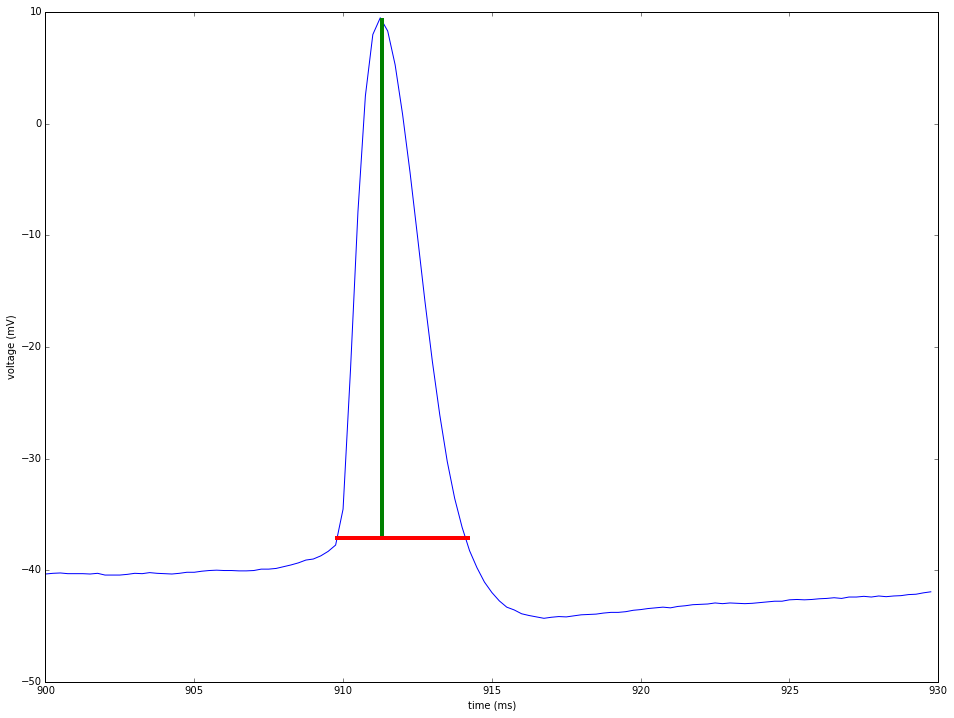

In [17]:
second_peak_time = feature_values['peak_time'][1]
second_peak_voltage = feature_values['peak_voltage'][1]
second_peak_amplitude = feature_values['AP_amplitude'][1]
second_ap_begin_time = feature_values['AP_begin_time'][1]
second_ap_begin_width = feature_values['AP_begin_width'][1]
second_ap_begin_voltage = feature_values['AP_begin_voltage'][1]


from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 16, 12
time_spike_indices = numpy.where((time > 900) & (time < 930))
time_spike = time[time_spike_indices]
voltage_spike = voltage[time_spike_indices]
plt.plot(time_spike, voltage_spike)
plt.plot([second_peak_time, second_peak_time], [second_peak_voltage, second_peak_voltage-second_peak_amplitude], linewidth=4)
plt.plot([second_ap_begin_time, second_ap_begin_time+second_ap_begin_width], 
         [second_ap_begin_voltage, second_ap_begin_voltage], linewidth=4)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()